In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [2]:
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install scikit-learn
%pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.5 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/12.6 MB 2.3 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/12.6 MB 4.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.6 MB 7.6 MB/s eta 0:00:01
   -------------------------------------- - 12.1/12.6 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 11


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\samir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 4.5 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\samir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\samir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\samir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 4.0 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 6.2 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 9.3 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.3 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.w


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\samir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Load dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)



In [5]:
# Data Summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [6]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [7]:

# Check Missing Values
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


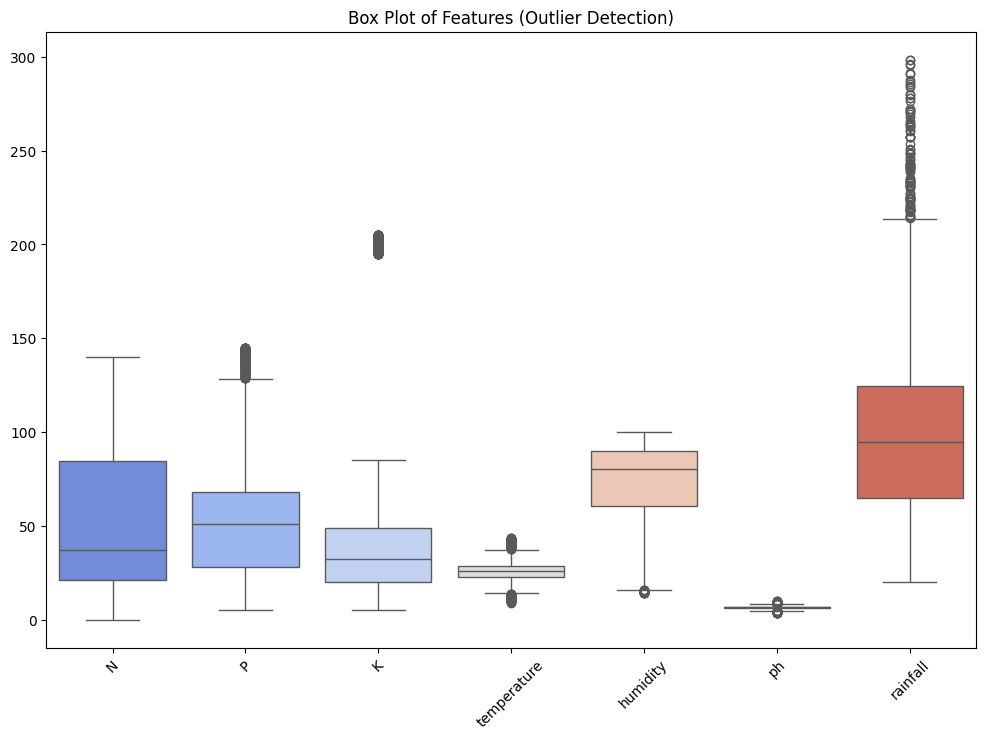

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot of Features (Outlier Detection)")
plt.show()

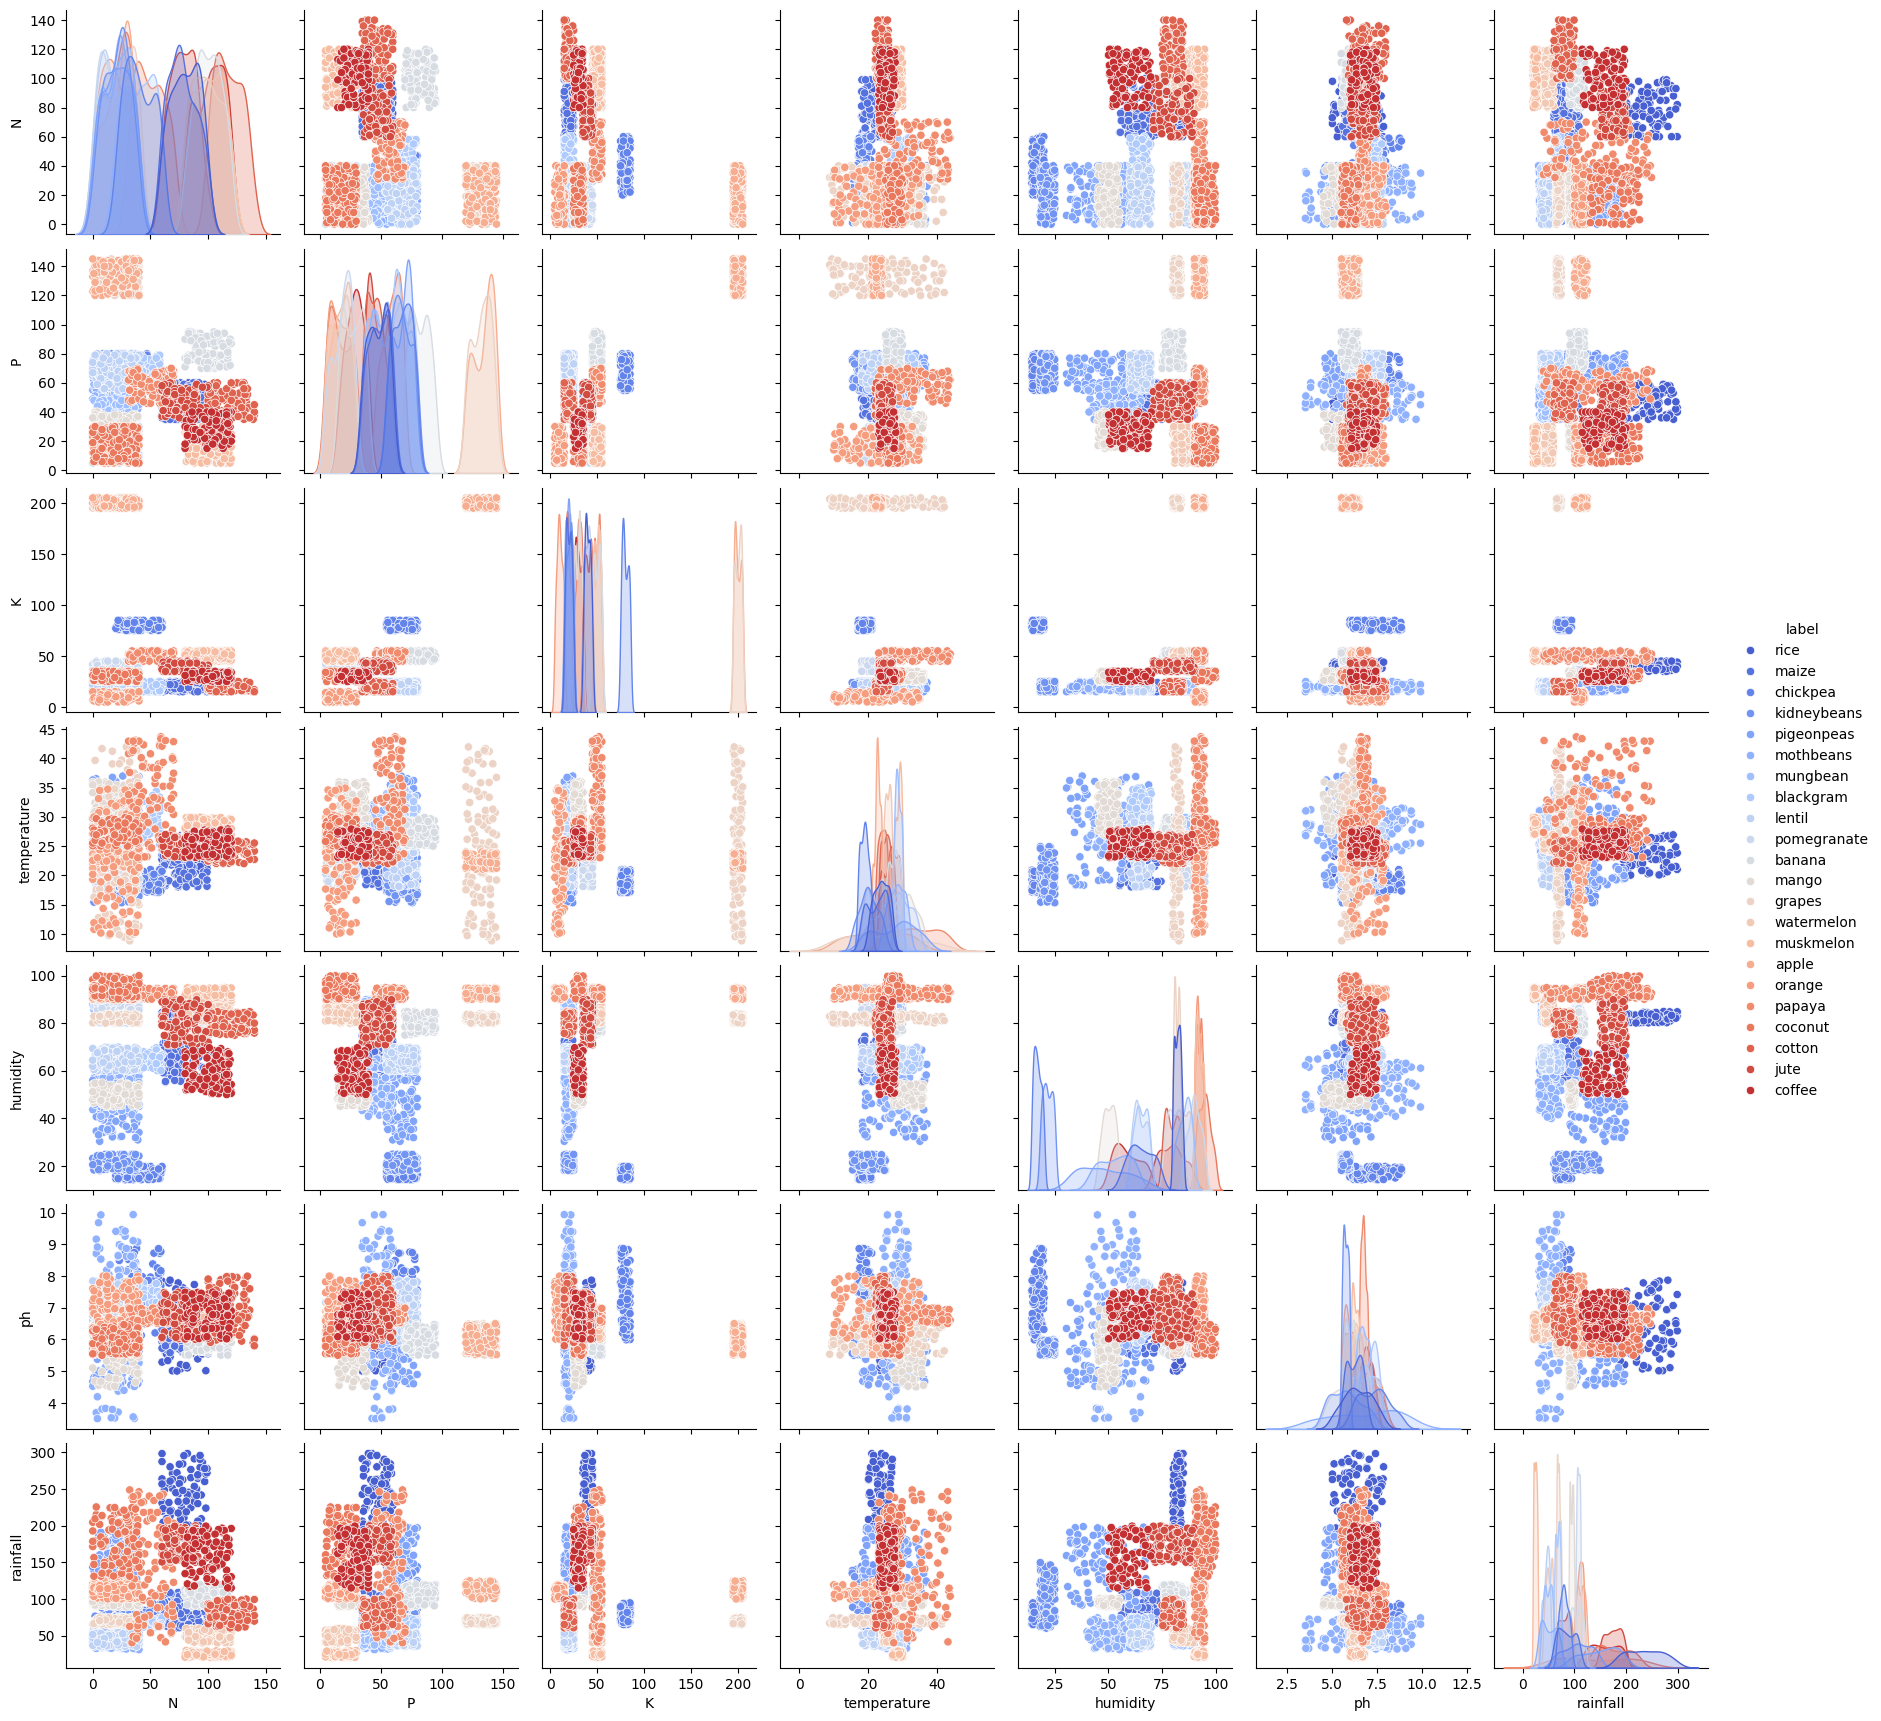

In [9]:
sns.pairplot(df, hue="label", palette="coolwarm", diag_kind="kde")
plt.show()

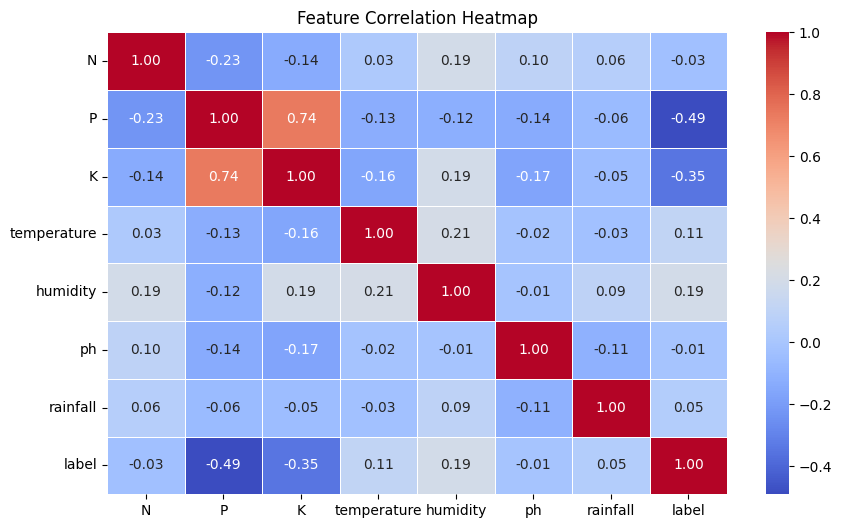

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Encode Target Variable
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

In [13]:
# Outlier Handling (Min-Max Replacement using IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
for col in df.columns[:-1]:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [15]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,213.841241,20
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,213.841241,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,213.841241,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,213.841241,20
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


In [16]:
# Split Features and Target
X = df.drop(columns=["label"])
y = df["label"]


In [17]:

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Random Forest with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}


In [20]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [21]:

# Train the Best Model
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [22]:
# Predictions & Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:2f}")
#print(classification_report(y_test, y_pred, target_names=le.classes_))





Model Accuracy: 0.995455


In [ ]:
def get_user_input():
    print("\nEnter details to predict the best crop")
    print("\n(Provide values based on soil, climate, and region)")

    while True:
        try:
            print("\nNitrogen (N) Content - Essential for plant growth and green leaves.")
            N = float(input("   ➤ Enter Nitrogen value [Typical Range: 0-140]: "))

            print("\nPhosphorus (P) Content - Helps in root and flower development.")
            P = float(input("   ➤ Enter Phosphorus value [Typical Range: 5-150]: "))

            print("\nPotassium (K) Content - Improves drought resistance and fruit quality.")
            K = float(input("   ➤ Enter Potassium value [Typical Range: 5-200]: "))

            print("\nTemperature (°C) - Affects seed germination and plant growth.")
            temperature = float(input("   ➤ Enter Temperature (°C) [Typical Range: 10-40]: "))

            print("\nHumidity (%) - Controls transpiration and water absorption.")
            humidity = float(input("   ➤ Enter Humidity (%) [Typical Range: 10-90]: "))

            print("\npH Level - Determines soil acidity/alkalinity (Ideal: 6-7).")
            ph = float(input("   ➤ Enter pH Level [Typical Range: 3-10]: "))

            print("\nRainfall (mm) - Determines crop water availability.")
            rainfall = float(input("   ➤ Enter Rainfall (mm) [Typical Range: 20-300]: "))

            # Check if values are within reasonable limits
            if not (0 <= N <= 140 and 5 <= P <= 150 and 5 <= K <= 200 and
                    10 <= temperature <= 40 and 10 <= humidity <= 90 and
                    3 <= ph <= 10 and 20 <= rainfall <= 300):
                print("\nWarning: Some values are outside typical ranges. Please verify your input.")

            # Transform & Predict
            user_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
            user_data_scaled = scaler.transform(user_data)
            prediction = best_model.predict(user_data_scaled)
            predicted_crop = le.inverse_transform(prediction)[0]

            print(f"\nRecommended Crop: {predicted_crop}")
            break  # Exit loop if input is valid

        except ValueError:
            print("\nInvalid input! Please enter numeric values only.")

# Call Function
get_user_input()



Enter details to predict the best crop

(Provide values based on soil, climate, and region)

Nitrogen (N) Content - Essential for plant growth and green leaves.
